<a href="https://colab.research.google.com/github/Harsha-Chowdary/Python/blob/main/Copy_of_OCR_withsingle_image_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pytesseract

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import cv2 # it is used for detecting and recognizing images, tracking moving objects, extracting 3D models
import pytesseract # It allows you to use Tesseract from Python programs to perform OCR on images, convert images containing text into machine-readable text

In [3]:
# upload an image in to google colab
from google.colab import files
from PIL import Image # It provides functions for opening and saving images, as well as for manipulating images by resizing, cropping, rotating, and applying image filters

In [4]:
uploaded = files.upload()

Saving Bhuvan_bam_aadhar.jpg to Bhuvan_bam_aadhar.jpg


In [5]:
for fn in uploaded.keys():
    image = Image.open(fn)
    image.show()

In [6]:
# Read the image
image = cv2.imread('Bhuvan_bam_aadhar.jpg')

In [7]:
print(image)

[[[251 251 251]
  [252 252 252]
  [254 254 254]
  ...
  [255 255 255]
  [251 251 251]
  [230 230 230]]

 [[251 251 251]
  [252 252 252]
  [254 254 254]
  ...
  [255 255 255]
  [251 251 251]
  [230 230 230]]

 [[251 251 251]
  [252 252 252]
  [254 254 254]
  ...
  [255 255 255]
  [251 251 251]
  [230 230 230]]

 ...

 [[251 251 251]
  [252 252 252]
  [254 254 254]
  ...
  [255 255 255]
  [251 251 251]
  [230 230 230]]

 [[251 251 251]
  [252 252 252]
  [254 254 254]
  ...
  [255 255 255]
  [251 251 251]
  [230 230 230]]

 [[251 251 251]
  [252 252 252]
  [254 254 254]
  ...
  [255 255 255]
  [251 251 251]
  [230 230 230]]]


In [8]:
# Convert the image to grayscale
# converting an image to grayscale can simplify the OCR process and improve the accuracy of text recognition.
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
print(gray)

[[251 252 254 ... 255 251 230]
 [251 252 254 ... 255 251 230]
 [251 252 254 ... 255 251 230]
 ...
 [251 252 254 ... 255 251 230]
 [251 252 254 ... 255 251 230]
 [251 252 254 ... 255 251 230]]


In [9]:
# Apply Otsu threshold
# It converts a grayscale image into a binary image and can be useful in the preprocessing of images for OCR
thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]

In [10]:
!apt-get install tesseract-ocr

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 23 not upgraded.
Need to get 4,850 kB of archives.
After this operation, 16.3 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1 [1,598 kB]
Get:2 http://archive.ubuntu.com/ubuntu focal/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu focal/universe amd64 tesseract-ocr amd64 4.1.1-2build2 [262 kB]
Fetched 4,850 kB in 0s (24.5 MB/s)
Selecting previously unselected package tesseract-ocr-eng.
(Reading database ... 129504 files and directories currently installed.)
Preparing to unpack .../tesseract-ocr-eng_1%3a

In [11]:
# Run Tesseract OCR on the image
text = pytesseract.image_to_string(thresh) # Returns the result of a Tesseract OCR run on the provided image to string

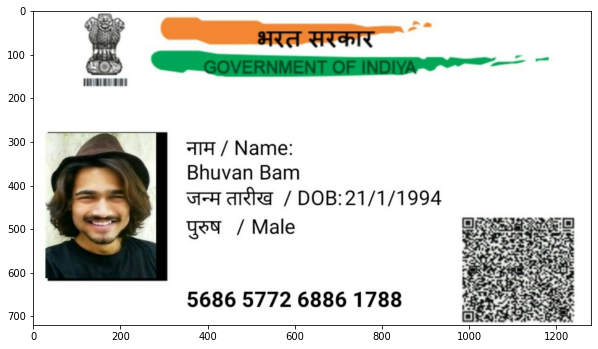

In [12]:
# print the image
import matplotlib.pyplot as plt
#import matplotlib.image as mpimg
import imageio
%matplotlib inline
pic = imageio.imread("Bhuvan_bam_aadhar.jpg")
plt.figure(figsize=(10,10))
plt.imshow(pic)

In [13]:

print(text)

text_list = text.split(" ")




print(text_list)

 

 

ava / Name:
Bhuvan Bam
w-H aka / DOB:21/1/1994

gea / Male

5686 5772 6886 1788

 

['', '\n\n', '\n\nava', '/', 'Name:\nBhuvan', 'Bam\nw-H', 'aka', '/', 'DOB:21/1/1994\n\ngea', '/', 'Male\n\n5686', '5772', '6886', '1788\n\n', '\n\x0c']


In [14]:
import pandas as pd
import re

In [15]:
# Cleaning the \n from the list
text_list = [re.sub('\n', '', x) for x in text_list]

# Converting the list into the Strings
text_list= " ".join(["".join(x) for x in text_list])

# Cleaning the comas',' and forward slashes'\'
text_list = re.sub(r'(,|/)', ' ',text_list)

# Spliting the date of birth by using the '-'
DOB = text_list.split('DOB:')[1]
DOB = "-".join(DOB.split())

outcome = text_list.replace(text_list.split('DOB:')[1],DOB)

# Extract the name after the "Name:" key
name = re.search(r'Name:(.*?)\s', outcome).group(1)

# Extract the DOB after the "DOB:" key
dob = re.search(r'\d+-\d+-\d+', outcome).group()

# Extract the Male or Female from the list and assigning it to the Gender variable
gender = re.findall(r'(Male|Female)', outcome)[0]

# Extracting the aadhar number from the list and assigning it to the aadhar variable
aadhar = "-".join(re.findall(r'\d+', outcome)[-4:])

#print("Name:",name)
#print("DOB:",dob)
#print("gender:",gender)
#print("aadhar:",aadhar)

#print(outcome)
# Converting to the Dictionaries form by aassigning the key values to them
data_dict = {"Name": name, "DOB": dob, "gender": gender, "aadhar_number": aadhar}
print(data_dict)


{'Name': 'Bhuvan', 'DOB': '21-1-1994', 'gender': 'Male', 'aadhar_number': '5686-5772-6886-1788'}
